In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('day.csv')

In [2]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [4]:
data.drop(labels=['instant','dteday','casual','registered','holiday','weekday','workingday','temp'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   weathersit  731 non-null    int64  
 4   atemp       731 non-null    float64
 5   hum         731 non-null    float64
 6   windspeed   731 non-null    float64
 7   cnt         731 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 45.8 KB


In [15]:
data.corr()

,season,yr,mnth,weathersit,atemp,hum,windspeed,cnt
season,1.000000,-0.001844,0.831440,0.019211,0.342876,0.205445,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,-0.048727,0.046106,-0.110651,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.043528,0.227459,0.222204,-0.207502,0.279977
weathersit,0.019211,-0.048727,0.043528,1.000000,-0.121583,0.591045,0.039511,-0.297391
atemp,0.342876,0.046106,0.227459,-0.121583,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,0.591045,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.011817,-0.207502,0.039511,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.406100,0.566710,0.279977,-0.297391,0.631066,-0.100659,-0.234545,1.000000


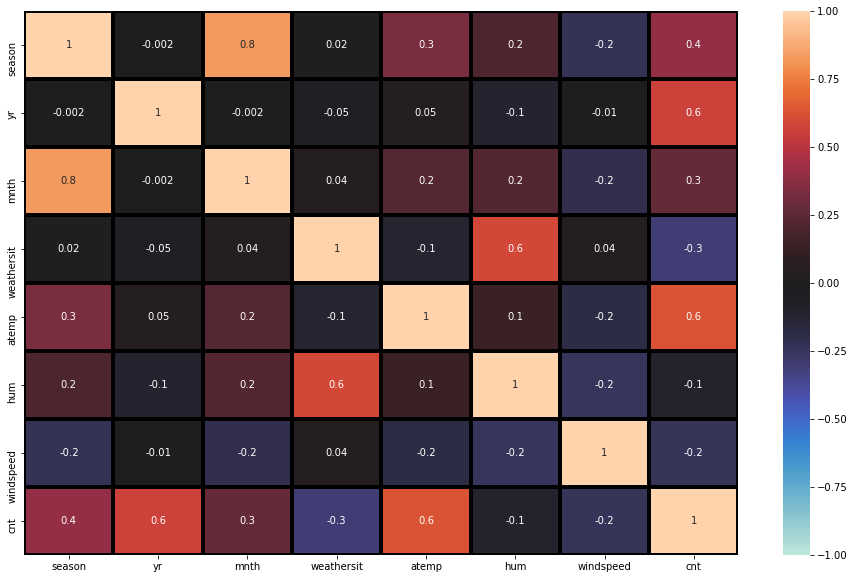

In [7]:
feature_data = data.drop(columns="cnt", axis=1)
target_data = data["cnt"]
plt.figure(figsize=(16, 10))
dataplot = sns.heatmap(data.corr(),  annot = True, 
                       fmt='.1g', vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black')

plt.show()

In [8]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [12]:
y_pred=dtr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8386733276864045